In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('student.csv')

In [19]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [20]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [21]:
#Checking is there any null values are present , if present then display its total
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [22]:
#Dropping the unwanted column
df =df.drop('Unnamed: 0',axis = 1)
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


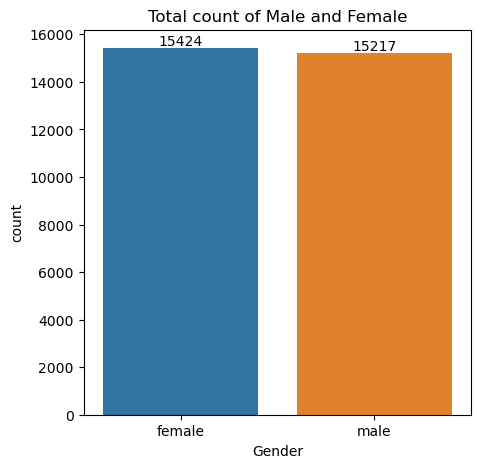

In [55]:
plt.figure(figsize = (5,5))
ax = sns.countplot(data = df , x = 'Gender')
ax.bar_label(ax.containers[0])
plt.title('Total count of Male and Female')
plt.show()


In [29]:
gb = df.groupby('ParentEduc')[['MathScore','ReadingScore','WritingScore']].mean()

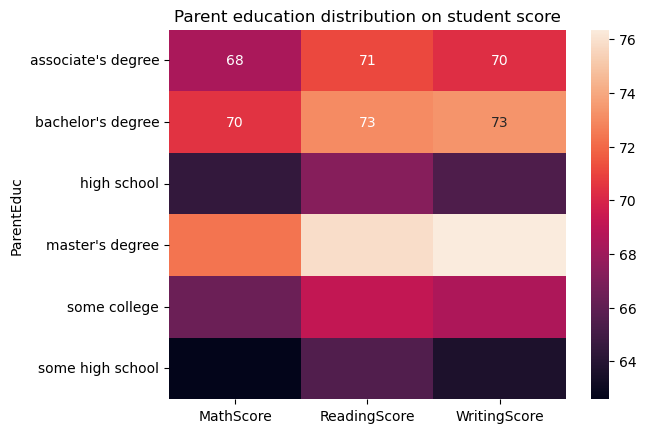

In [56]:
sns.heatmap(gb,annot = True)
plt.title('Parent education distribution on student score')
plt.show()

#There is high impact of Parent Education on student marks

In [37]:
pms = df.groupby('ParentMaritalStatus')[['MathScore',	'ReadingScore',	'WritingScore']].mean()

<Axes: title={'center': 'Distribution of Maritial status on student score'}, ylabel='ParentMaritalStatus'>

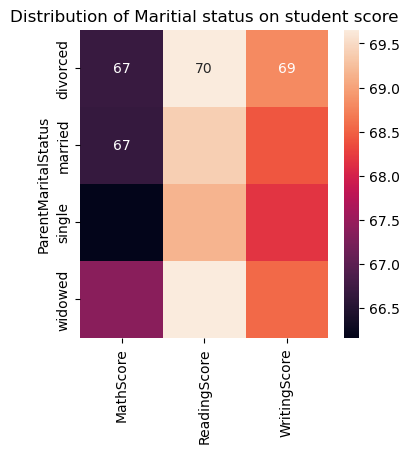

In [57]:
plt.figure(figsize =(4,4))
plt.title('Distribution of Maritial status on student score')
sns.heatmap(pms , annot = True)

#There is negligible impact of marital status on students marks

In [58]:
#Check unique values
df['EthnicGroup'].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

Text(0.5, 1.0, 'Distribution of Ethnic Group')

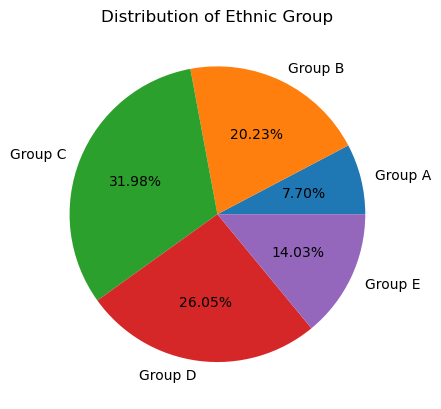

In [54]:
# Distribution of ethnic values
grp_A = df.loc[df['EthnicGroup'] == 'group A'].count()

grp_B = df.loc[df['EthnicGroup'] == 'group B'].count()
grp_C = df.loc[df['EthnicGroup'] == 'group C'].count()
grp_D = df.loc[df['EthnicGroup'] == 'group D'].count()
grp_E = df.loc[df['EthnicGroup'] == 'group E'].count()

dlist = [grp_A['EthnicGroup'],grp_B['EthnicGroup'],grp_C['EthnicGroup'],grp_D['EthnicGroup'],grp_E['EthnicGroup']]
label = ['Group A','Group B','Group C','Group D','Group E']

plt.pie(x = dlist,labels = label , autopct = '%1.2f%%')
plt.title('Distribution of Ethnic Group')